<a href="https://colab.research.google.com/github/Guillermoddb/master/blob/master/reuters_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels),(test_data, test_labels)= reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [2]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence]=1. 
  return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

from tensorflow.keras.utils import to_categorical 
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
from tensorflow.keras import models, layers

model= models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
x_val= x_train[:1000]
partial_x_train= x_train[1000:]

y_val= one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 56ms/step - loss: 2.7356 - accuracy: 0.5200 - val_loss: 1.7641 - val_accuracy: 0.6480
Epoch 2/20
16/16 [==============================] - 1s 46ms/step - loss: 1.4181 - accuracy: 0.7086 - val_loss: 1.3108 - val_accuracy: 0.7200
Epoch 3/20
16/16 [==============================] - 1s 45ms/step - loss: 1.0401 - accuracy: 0.7766 - val_loss: 1.1424 - val_accuracy: 0.7470
Epoch 4/20
16/16 [==============================] - 1s 45ms/step - loss: 0.8239 - accuracy: 0.8220 - val_loss: 1.0493 - val_accuracy: 0.7710
Epoch 5/20
16/16 [==============================] - 1s 45ms/step - loss: 0.6611 - accuracy: 0.8597 - val_loss: 0.9907 - val_accuracy: 0.7790
Epoch 6/20
16/16 [==============================] - 1s 45ms/step - loss: 0.5298 - accuracy: 0.8913 - val_loss: 0.9517 - val_accuracy: 0.7960
Epoch 7/20
16/16 [==============================] - 1s 45ms/step - loss: 0.4277 - accuracy: 0.9119 - val_loss: 0.9531 - val_accuracy: 0.7960
Epoch 8/20
16

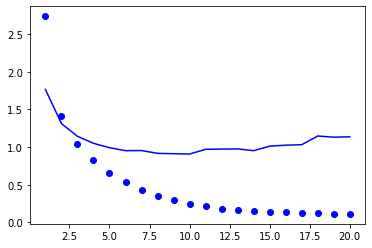

In [10]:
import matplotlib.pyplot as plt
% matplotlib inline

loss= history.history['loss']
val_loss = history.history['val_loss']

epochs= range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.show()